**<h1>About Dataset<h1>**

1)The company has shared its annual car insurance data. Now, you we to find out the real customer behaviors over the data.

2)The columns are resembling practical world features.

3)The outcome column indicates 1 if a customer has claimed his/her loan else 0.

4)The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

**<h1>Bussiness Requirement<h1>**

Here we need to find whether the given customer will claim for insurance or not

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

<H1>(1.1)-LOADING DATA<H1>

In [ ]:
#Load Car_Insurance_Claim.csv into a pandas dataFrame.

car_insurance = pd.read_csv("/content/drive/MyDrive/Car_Insurance_Claim.csv")

<H1>(1.2)-NO OF DATA POINTS<H1>

In [ ]:
print (car_insurance.shape)

(10000, 19)


<h2>Observation:<h2>

There are 10000 rows and 19 columns

In [ ]:
#column names in our dataset

print(car_insurance.columns)

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


In [ ]:
car_insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


<h2>Observation:<h2>

'OUTCOME' feature represents whether the claim has beed taken or not by the client so it is the decision feature

In [ ]:
#Check the info of the data set which describes null values, data type, memory usage
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

<h2>Observation:<h2>

float64, int64, and object are the data types of our features.

In [ ]:
#How many data points for each class are present in the 'OUTCOME' feature?

car_insurance["OUTCOME"].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

<h2>Observation:<h2>

           1.In the "OUTCOME",
                0- persons not claimed for the loan 
                1- persons  claimed for the loan 
           2.so,out of 10000 insured 3133 have claimed for the loan
           3.It is an imbalanced data set

<H1>(1.3)-Description of the Dataset<H1>

In [ ]:
car_insurance.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


<h2>Observation:<h2>

Checking the description of the data set which describes the minimum value, maximum value, mean value, total count, standard deviation etc.

<H1>(1.4)-MISSING VALUES<H1>

In [ ]:
car_insurance.isnull().sum().sort_values(ascending = False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

<h2>Observation:<h2>

There are two features which has missing values which are 'CREDIT_SCORE'and 'ANNUAL_MILEAGE' . Both of them are of the datatype 'float64'.

<H1>(2)-Exploratory Data Analysis<H1>

**<h2>Plots to analyse the dataset<h2>**

<H1>(2.1)-Histogram of the features<H1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f680a7f1f50>,
      dtype=object)

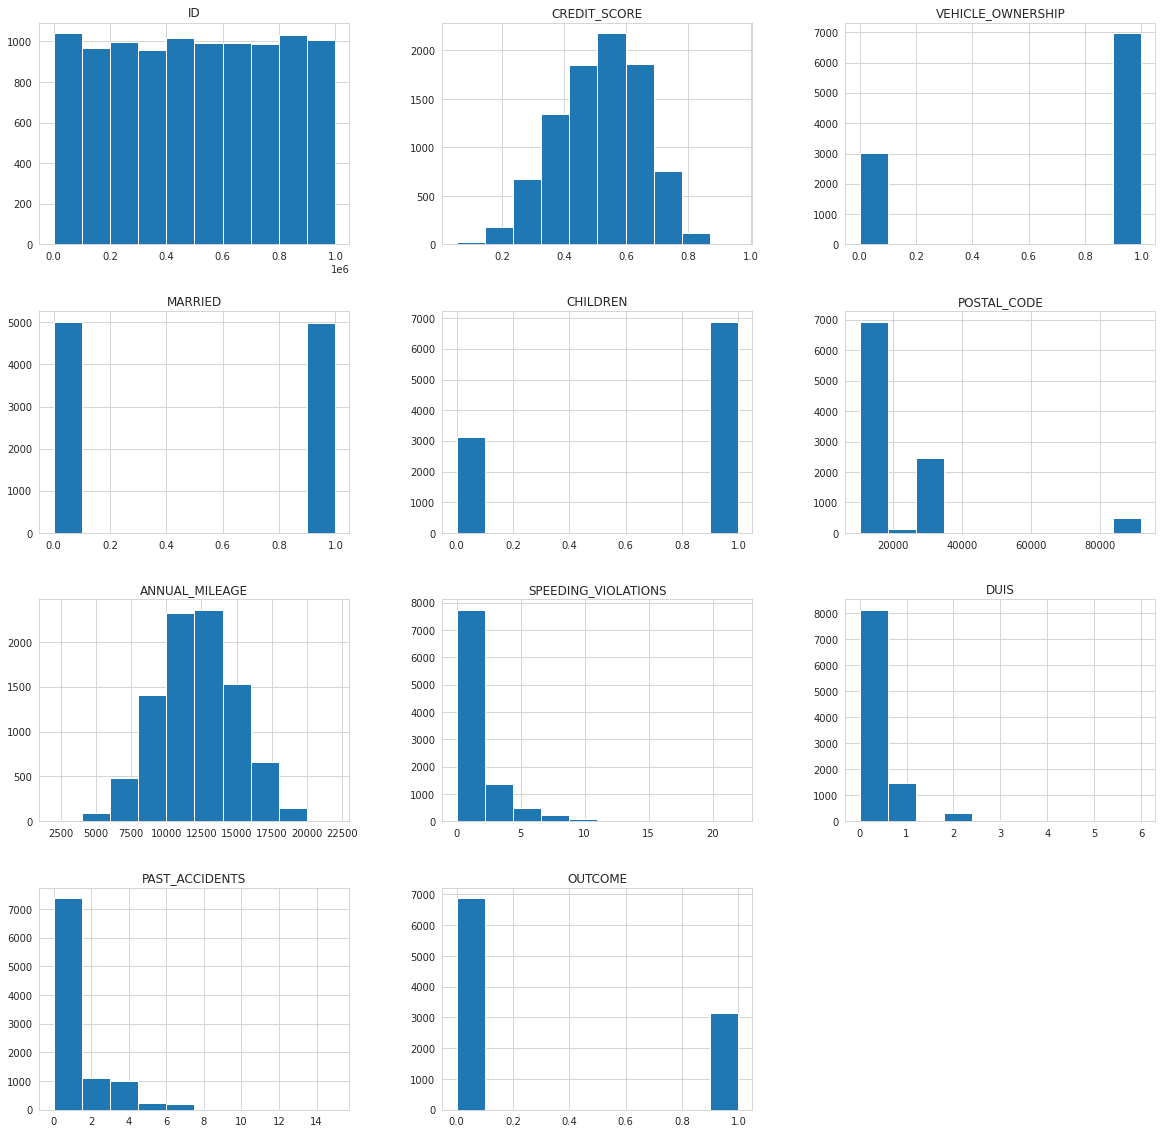

In [ ]:
# Histogram 
car_insurance.hist(figsize=(20,20))

<h2>Observation:<h2>

There is a mix of all distributions present  for the features.so we can conclude much from this.

<H1>(2.2)-Pair Plot<H1>

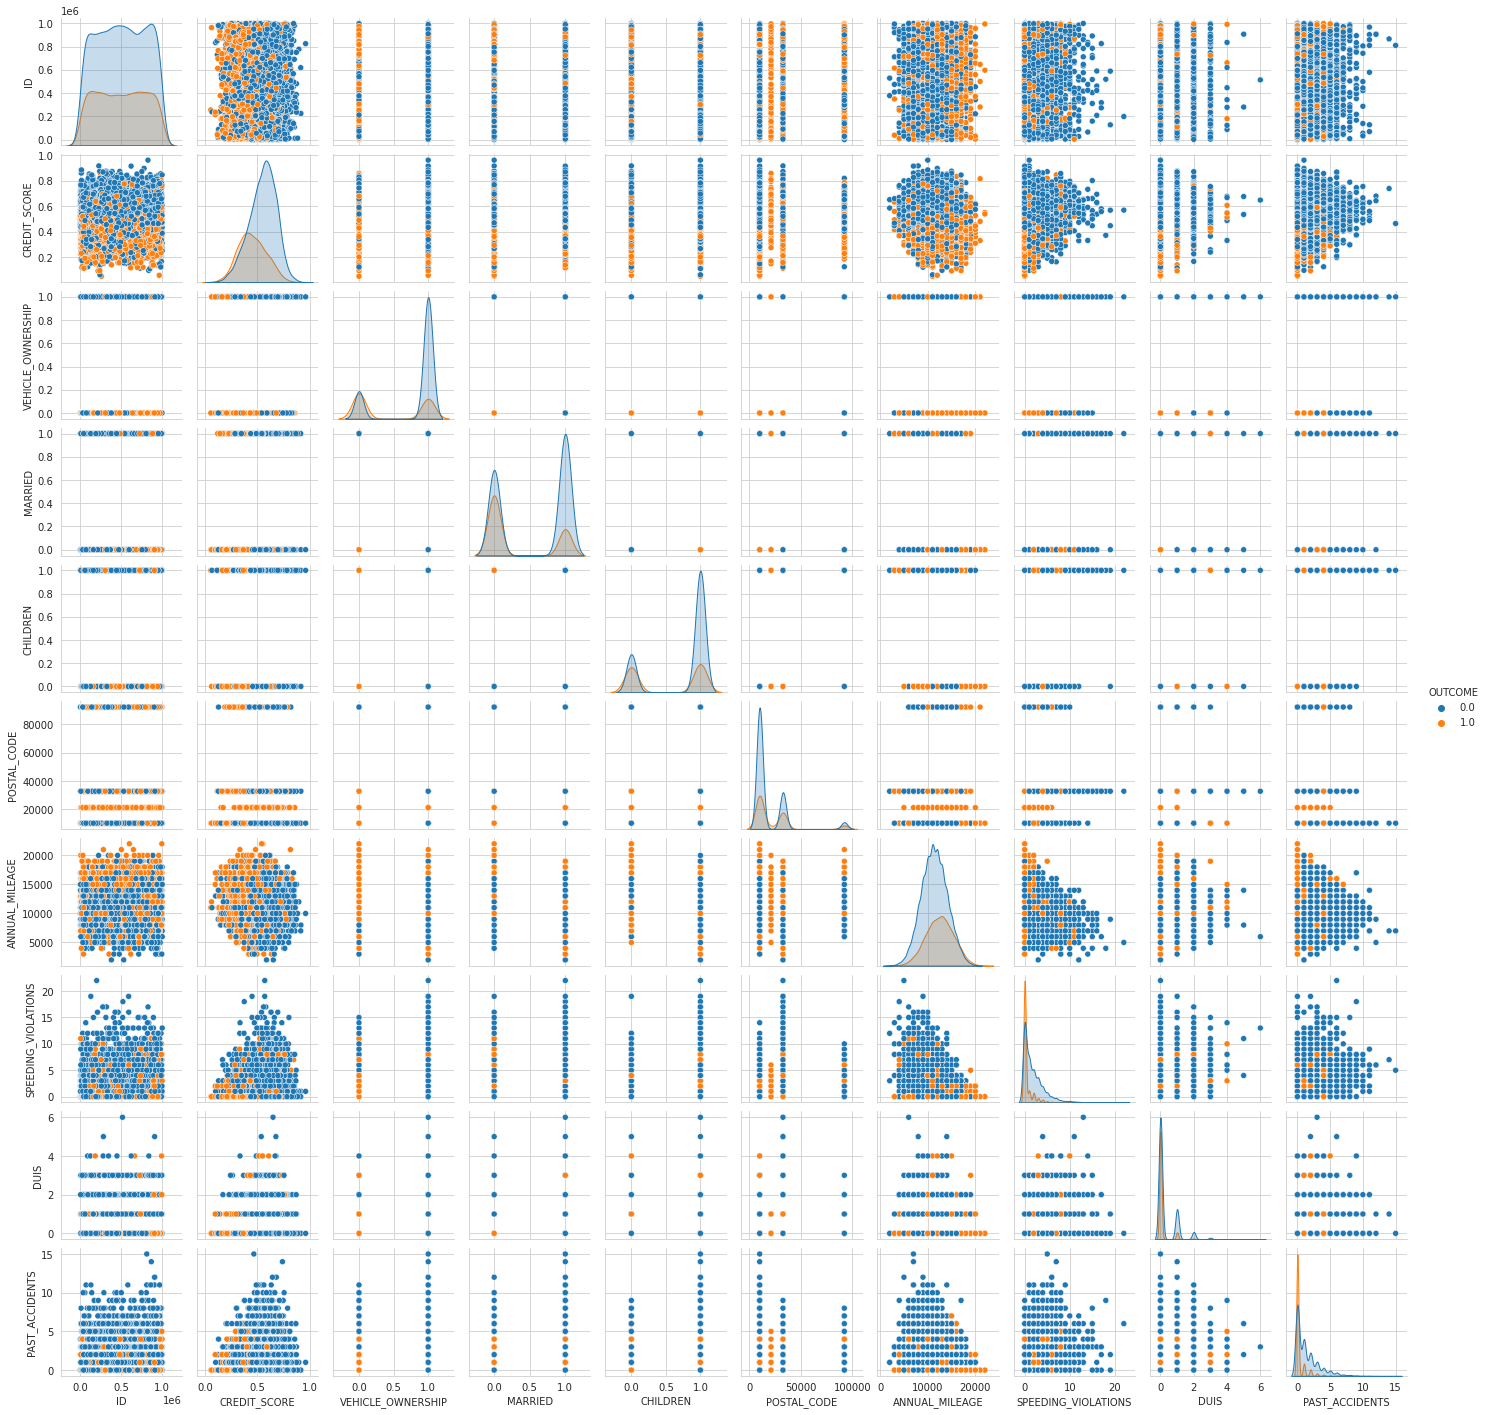

In [ ]:
sns.pairplot(car_insurance,hue= "OUTCOME",size=2);
plt.show()

<h2>Observation:<h2>

Here we can't conclude anything since all are overlapping

<H1>(2.3)-Correlation Plot<H1>

In [ ]:
corr_matrix = car_insurance.corr()

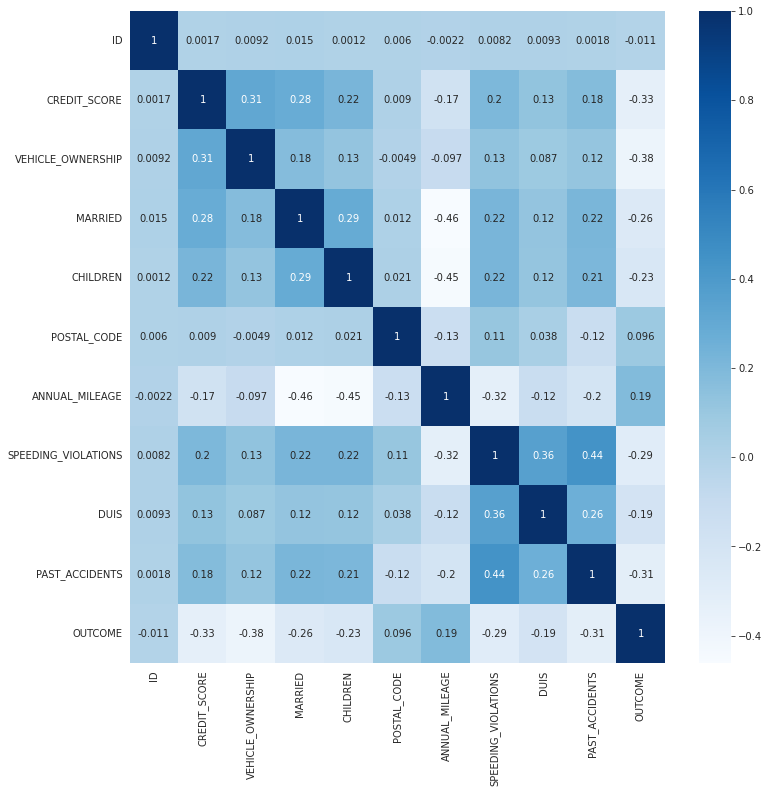

In [ ]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,12))
Heat_Map= sns.heatmap(corr_matrix,annot=True,cmap='Blues')

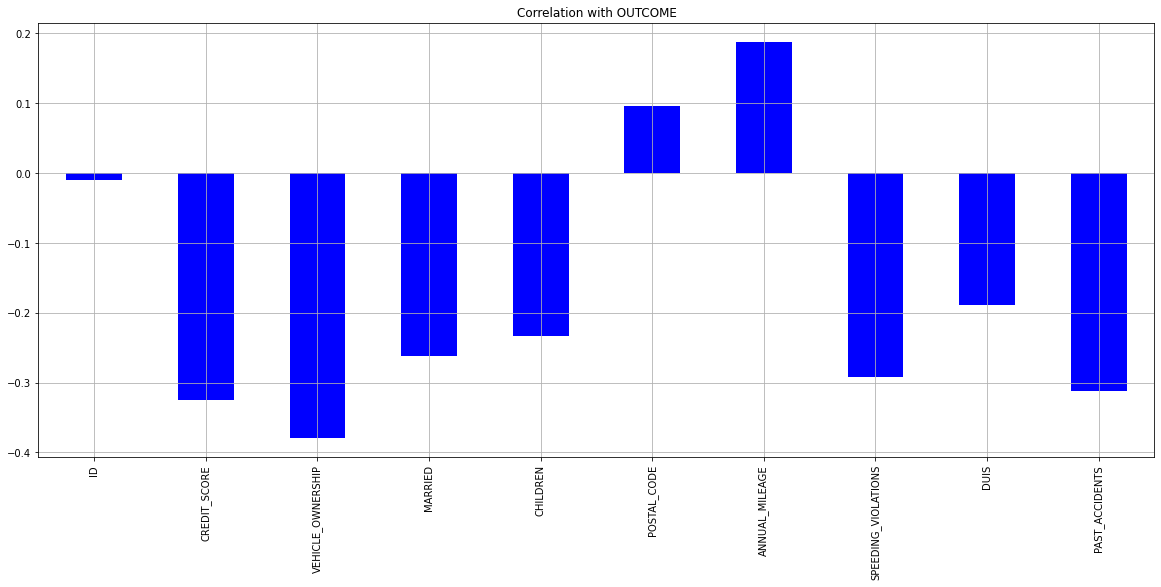

In [ ]:
car_insurance.drop('OUTCOME', axis=1).corrwith(car_insurance.OUTCOME).plot(kind='bar', grid=True, figsize=(20, 8),
                                                                           title="Correlation with OUTCOME",color="blue");

<h2>Observation:<h2>

1) Features 'ID' and 'POSTAL_CODE' have least correlation with the decision feature 'OUTCOME'

2) All other variables have significant correlation with 'OUTCOME' .

3) 'ID' feature is not much important for analysis since it is a representation id of each customer but 'POSTAL_CODE' feature will has some influence since it will help us to find from which geographical location cliams have been taken. 

<H1>(2.4)-Realationship of all the features with 'OUTCOME' decision variable<H1>

<h2>(2.4.1)-Relationship Between Age vs OUTCOME:<h2>

In [ ]:
car_insurance.AGE.drop_duplicates()

0      65+
1    16-25
4    26-39
5    40-64
Name: AGE, dtype: object

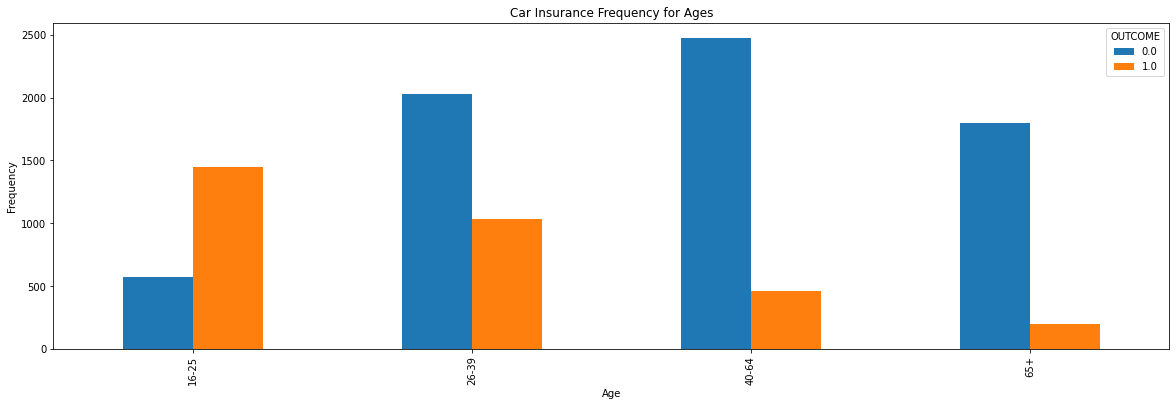

In [ ]:
pd.crosstab(car_insurance.AGE,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('Age vs OUTCOME')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) Here we can see that people between the age of '16-25' and '26-39' are more likely to claim the insurance. 

2) In other words we can say people below the age of 40 are more likely to claim the insurance.



<h2>(2.4.2)-Relationship Between GENDER vs OUTCOME<h2>

In [ ]:
car_insurance.GENDER.drop_duplicates()

0    female
1      male
Name: GENDER, dtype: object

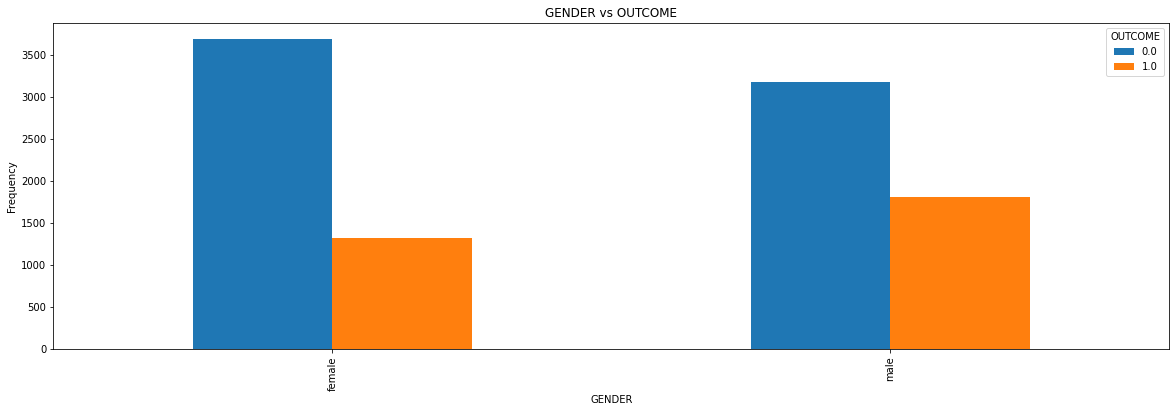

In [ ]:
pd.crosstab(car_insurance.GENDER,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('GENDER vs OUTCOME')
plt.xlabel('GENDER')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

'MALE' are most likely to claimed the loan than 'FEMALE'.

<h2>(2.4.3)-Relationship Between INCOME VS OUTCOME<h2>

In [ ]:
car_insurance.INCOME.drop_duplicates()

0       upper class
1           poverty
2     working class
14     middle class
Name: INCOME, dtype: object

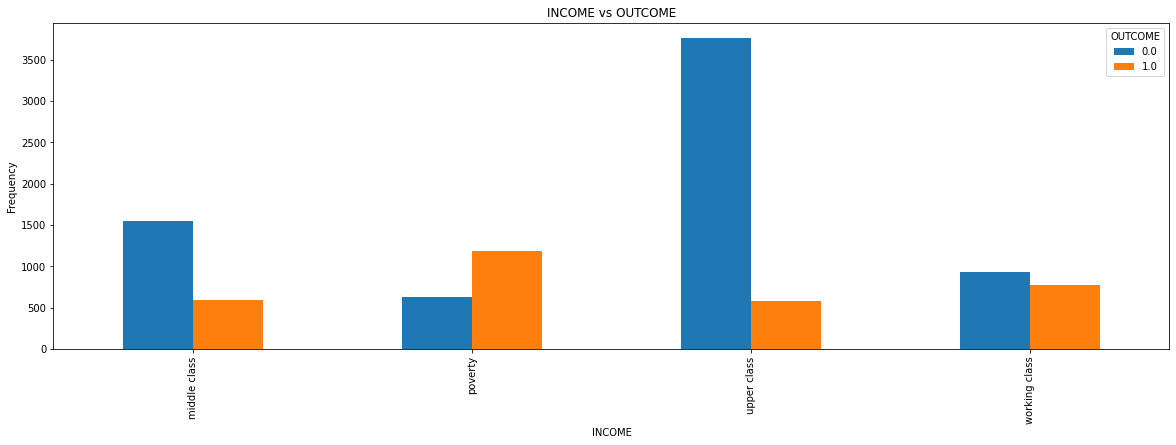

In [ ]:
pd.crosstab(car_insurance.INCOME,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('INCOME vs OUTCOME')
plt.xlabel('INCOME')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) Belonging to poverty class claimed the insurance more as compared to the other classes in the 'INCOME' feature.

<h2>(2.4.4)-Relationship Between EDUCATION VS OUTCOME :<h2>

In [ ]:
car_insurance.EDUCATION.drop_duplicates()

0    high school
1           none
3     university
Name: EDUCATION, dtype: object

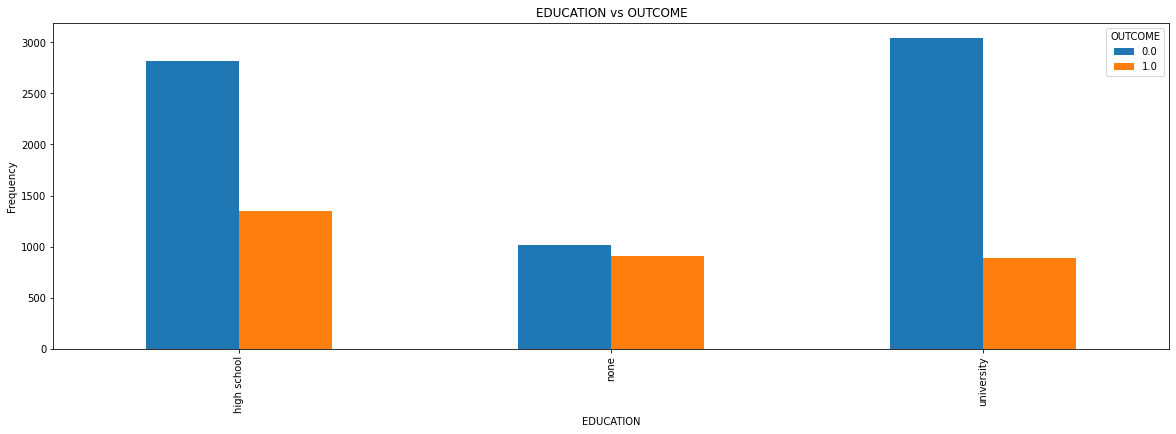

In [ ]:
pd.crosstab(car_insurance.EDUCATION,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('EDUCATION vs OUTCOME')
plt.xlabel('EDUCATION')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) Persons belonging to highschool class claim the insurance more as compared to the other classes in the 'EDUCATION' feature.

2) There are missing values in this features

<h2>(2.4.5)-Relationship Between DRIVING_EXPERIENCE VS OUTCOME :<h2>

In [ ]:
car_insurance.DRIVING_EXPERIENCE.drop_duplicates()

0      0-9y
4    10-19y
5    20-29y
6      30y+
Name: DRIVING_EXPERIENCE, dtype: object

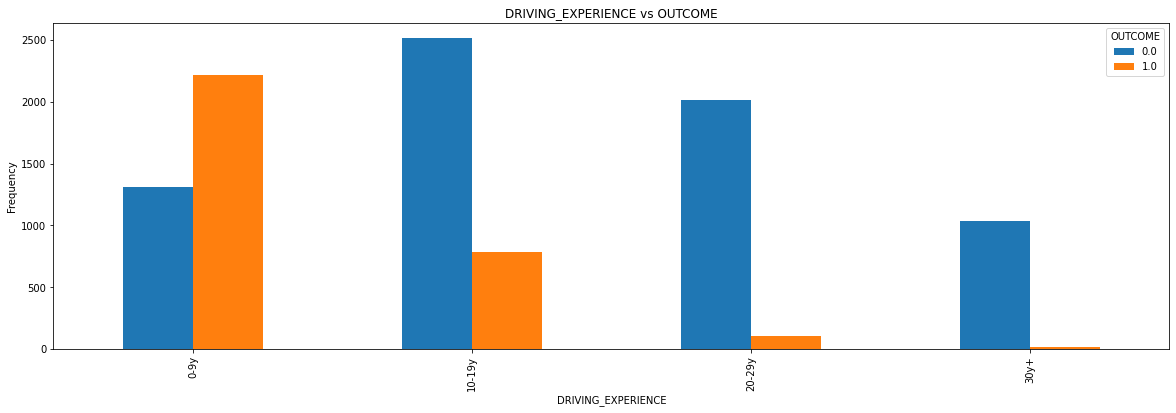

In [ ]:
pd.crosstab(car_insurance.DRIVING_EXPERIENCE,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('DRIVING_EXPERIENCE vs OUTCOME')
plt.xlabel('DRIVING_EXPERIENCE')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) Persons belonged to '0-9y' experience have claimed then insurance as compared to the other classes in this feature.

2)To conclude from this feature is that person with less experience have claimed the insurance as compared to the experienced ones.

In [ ]:
3   RACE                 10000 non-null  object    
 9   VEHICLE_YEAR         10000 non-null  object 
 14  VEHICLE_TYPE         10000 non-null  object 

<h2>(2.4.6)-Relationship Between CREDIT_SCORE VS OUTCOME :<h2>

In [ ]:
car_insurance.CREDIT_SCORE.drop_duplicates()

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: CREDIT_SCORE, Length: 9019, dtype: float64

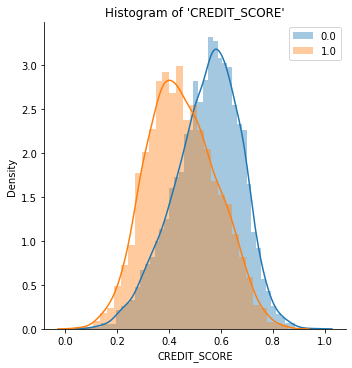

In [ ]:
# CREDIT_SCORE is a continous variable so i am using histogram rather than bar graph 

sns.FacetGrid(car_insurance, hue="OUTCOME", size=5) \
   .map(sns.distplot, "CREDIT_SCORE")
plt.title("Histogram of 'CREDIT_SCORE'")
plt.legend()
plt.show();

<h2>Observation:<h2>

There is a lot overlapping so we cannot conclude  much from this.

<h2>(2.4.7)-Relationship Between VEHICLE_OWNERSHIP VS OUTCOME :<h2>

In [ ]:
car_insurance.VEHICLE_OWNERSHIP.drop_duplicates()

0    1.0
1    0.0
Name: VEHICLE_OWNERSHIP, dtype: float64

In [ ]:
#it is a categrical variable but given in float format which may also confuse since same category have been given for 'OUTCOME' also.
# So we are replacing the category values.

# 'YES' - Owned a vehichle

# 'NO' - Not owned a vehichle

car_insurance.VEHICLE_OWNERSHIP.replace({1: "YES", 0 : "NO"}, inplace=True)

In [ ]:
car_insurance.VEHICLE_OWNERSHIP.drop_duplicates()

0    YES
1     NO
Name: VEHICLE_OWNERSHIP, dtype: object

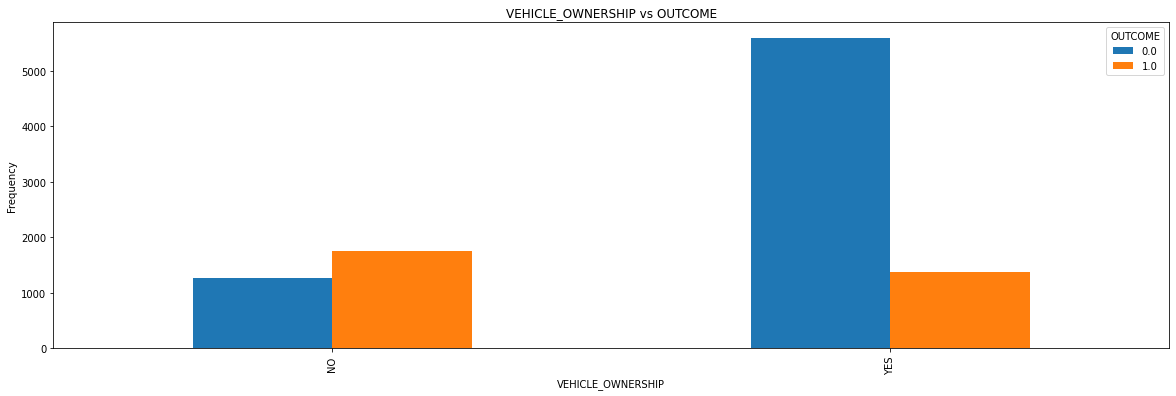

In [ ]:
pd.crosstab(car_insurance.VEHICLE_OWNERSHIP,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('VEHICLE_OWNERSHIP vs OUTCOME')
plt.xlabel('VEHICLE_OWNERSHIP')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1)Persons who have't owned the vechile  claimed the insurance more than the married ones.

2) With in the persons who have owned the vehichle large quantity have not claimed the insurance.

<h2>(2.4.8)-Relationship Between MARRIED VS OUTCOME :<h2>

In [ ]:
car_insurance.MARRIED.drop_duplicates()

0    0.0
6    1.0
Name: MARRIED, dtype: float64

In [ ]:
#it is a categrical variable but given in float format which may also confuse since same category have been given for 'OUTCOME' also.
# So we are replacing the category values.

# 'YES' - Married

# 'NO' - Not Married

car_insurance.MARRIED.replace({1: "YES", 0 : "NO"}, inplace=True)

In [ ]:
car_insurance.MARRIED.drop_duplicates()

0     NO
6    YES
Name: MARRIED, dtype: object

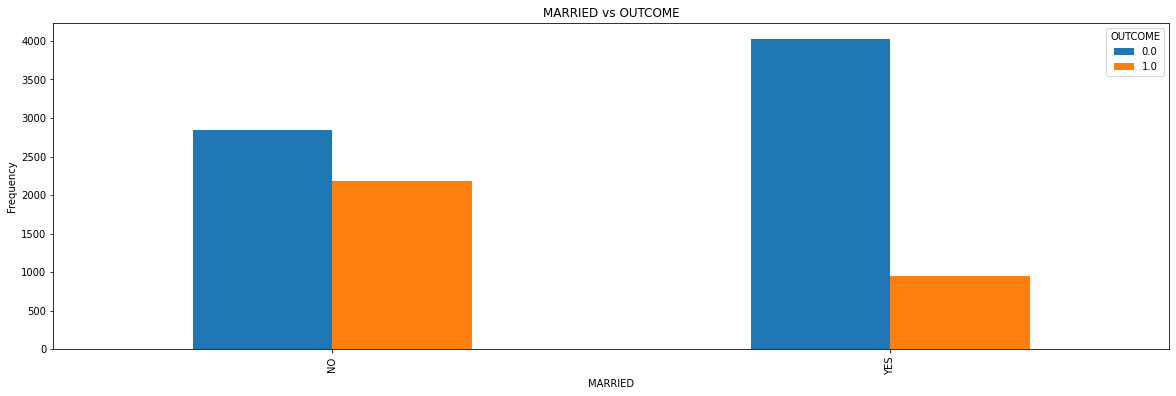

In [ ]:
pd.crosstab(car_insurance.MARRIED,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('MARRIED vs OUTCOME')
plt.xlabel('MARRIED')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1)Persons who have't married  claimed the insurance more than the married ones.

2) With in the persons who have married,large quantity have not claimed the insurance.

<h2>(2.4.9)-Relationship Between CHILDREN VS OUTCOME :<h2>

In [ ]:
car_insurance.CHILDREN.drop_duplicates()

0    1.0
1    0.0
Name: CHILDREN, dtype: float64

In [ ]:
#it is a categrical variable but given in float format which may also confuse since same category have been given for 'OUTCOME' also.
# So we are replacing the category values.

# 'YES' - Having children 

# 'NO' - Not Having children

car_insurance.CHILDREN.replace({1: "YES", 0 : "NO"}, inplace=True)

In [ ]:
car_insurance.CHILDREN.drop_duplicates()

0    YES
1     NO
Name: CHILDREN, dtype: object

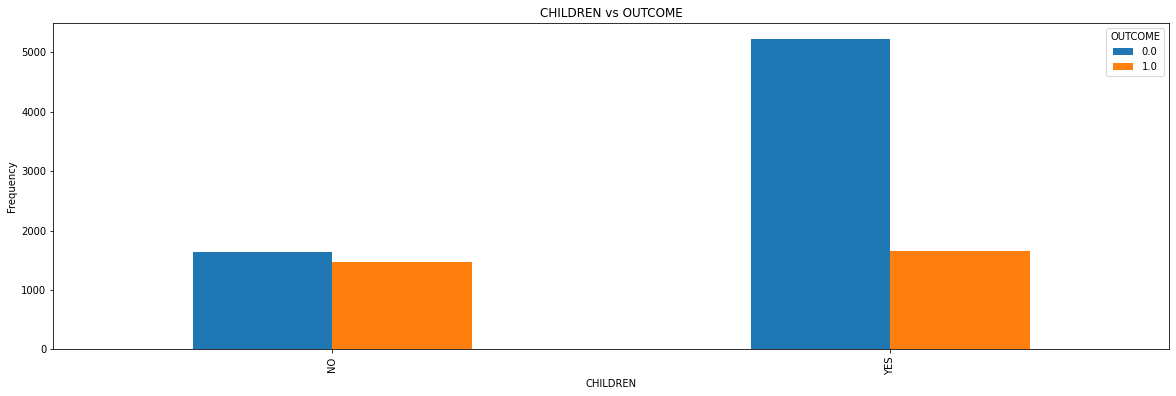

In [ ]:
pd.crosstab(car_insurance.CHILDREN,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('CHILDREN vs OUTCOME')
plt.xlabel('CHILDREN')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1)Both the classes of the claimed the insurance moreover same. 

2) With in the persons who have children,large quantity have not claimed the insurance.

<h2>(2.4.10)-Relationship Between POSTAL_CODE VS OUTCOME :<h2>

In [ ]:
car_insurance.POSTAL_CODE.drop_duplicates()

0     10238
3     32765
30    92101
34    21217
Name: POSTAL_CODE, dtype: int64

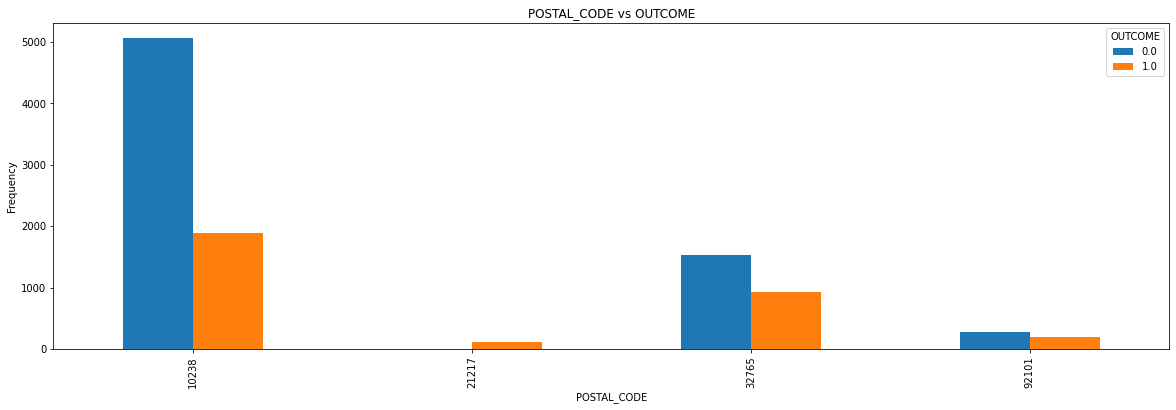

In [ ]:
pd.crosstab(car_insurance.POSTAL_CODE,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('POSTAL_CODE vs OUTCOME')
plt.xlabel('POSTAL_CODE')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) Persons belong to '10238' have claimed the insurance more as compared to the other codes given.

<h2>(2.4.11)-Relationship Between ANNUAL_MILEAGE VS OUTCOME :<h2>

In [ ]:
car_insurance.ANNUAL_MILEAGE.drop_duplicates()


0       12000.0
1       16000.0
2       11000.0
5       13000.0
7       14000.0
10      10000.0
12       8000.0
13          NaN
19      18000.0
20      17000.0
24       7000.0
27      15000.0
29       9000.0
68       5000.0
169      6000.0
572     19000.0
920      4000.0
1593     3000.0
2607     2000.0
2720    20000.0
4401    21000.0
7319    22000.0
Name: ANNUAL_MILEAGE, dtype: float64

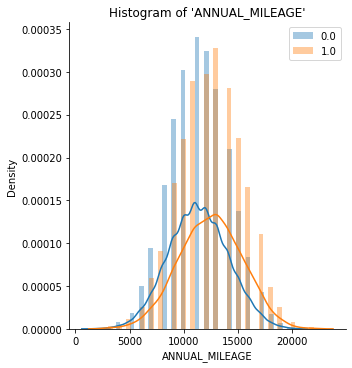

In [ ]:
# ANNUAL_MILEAGE is a continous variable so i am using histogram rather than bar graph 

sns.FacetGrid(car_insurance, hue="OUTCOME", size=5) \
   .map(sns.distplot, "ANNUAL_MILEAGE")
plt.title("Histogram of 'ANNUAL_MILEAGE'")
plt.legend()
plt.show();

<h2>Observation:<h2>

1)There is a lot of overlapping so we cannot conclude  much from this.

2) There are missing values in this feature.


<h2>(2.4.12)-Relationship Between SPEEDING_VIOLATIONS VS OUTCOME :<h2>

In [ ]:
car_insurance.SPEEDING_VIOLATIONS.drop_duplicates()

0        0
4        2
5        3
6        7
10       6
11       4
16      10
24      13
26       1
40       5
52       9
97       8
110     12
285     11
734     15
2701    17
3132    19
3492    18
3762    16
5015    14
6523    22
Name: SPEEDING_VIOLATIONS, dtype: int64

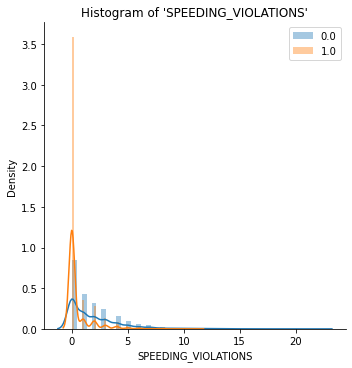

In [ ]:
# SPEEDING_VIOLATIONS is a continous variable so i am using histogram rather than bar graph 

sns.FacetGrid(car_insurance, hue="OUTCOME", size=5) \
   .map(sns.distplot, "SPEEDING_VIOLATIONS")
plt.title("Histogram of 'SPEEDING_VIOLATIONS'")
plt.legend()
plt.show();

<h2>Observation:<h2>

1) There is a lot of overlapping so we cannot conclude  much from this.

2) Persons who haven't gone through less or no speed violations have claimed the insurance

<h2>(2.4.13)-Relationship Between DUIS VS OUTCOME :<h2>

In [ ]:
car_insurance.DUIS.drop_duplicates()

0       0
10      2
12      1
642     3
3291    4
3670    5
8003    6
Name: DUIS, dtype: int64

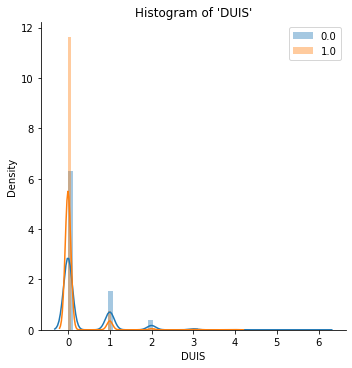

In [ ]:
# DUIS is a continous variable so i am using histogram rather than bar graph 

sns.FacetGrid(car_insurance, hue="OUTCOME", size=5) \
   .map(sns.distplot, "DUIS")
plt.title("Histogram of 'DUIS'")
plt.legend()
plt.show();

<h2>Observation:<h2>

1) There is a lot of overlapping so we cannot conclude  much from this.

<h2>(2.4.14)-Relationship Between PAST_ACCIDENTS VS OUTCOME :<h2>

In [ ]:
car_insurance.PAST_ACCIDENTS.drop_duplicates()

0        0
4        1
5        3
10       7
12       2
38       5
45       4
87       6
206      8
223     10
746     11
1564     9
4856    12
8824    14
9928    15
Name: PAST_ACCIDENTS, dtype: int64

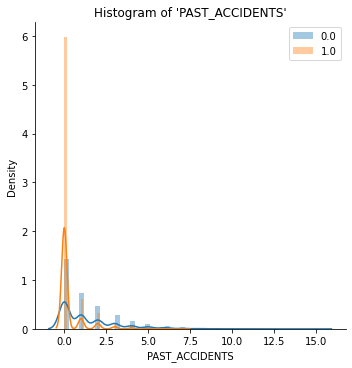

In [ ]:
# PAST_ACCIDENTS is a continous variable so i am using histogram rather than bar graph 

sns.FacetGrid(car_insurance, hue="OUTCOME", size=5) \
   .map(sns.distplot, "PAST_ACCIDENTS")
plt.title("Histogram of 'PAST_ACCIDENTS'")
plt.legend()
plt.show();

<h2>Observation:<h2>

1) Persons with less number of accidents have claimed the insurance more as compared to the others.

In [ ]:
CREDIT_SCORE

ANNUAL_MILEAGE

SPEEDING_VIOLATIONS

DUIS

PAST_ACCIDENTS

<h2>(2.4.15)-Relationship Between RACE VS OUTCOME :<h2>

In [ ]:
car_insurance.RACE.drop_duplicates()

0     majority
48    minority
Name: RACE, dtype: object

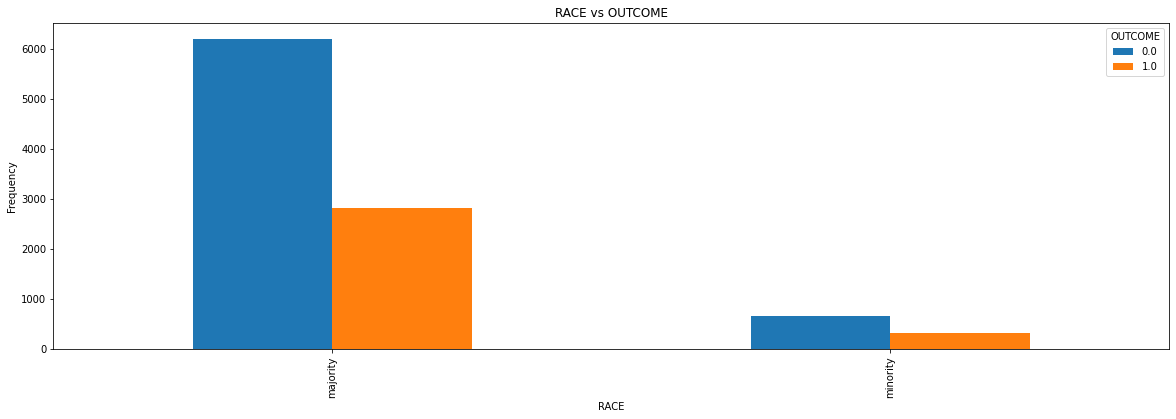

In [ ]:
pd.crosstab(car_insurance.RACE,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('RACE vs OUTCOME')
plt.xlabel('RACE')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) 'majority' class have claimed the insurance more as compared to minority class.

2)Most of the data have been involved with 'majority' class.

<h2>(2.4.16)-Relationship Between VEHICLE_YEAR VS OUTCOME :<h2>

In [ ]:
car_insurance.VEHICLE_YEAR.drop_duplicates()

0     after 2015
1    before 2015
Name: VEHICLE_YEAR, dtype: object

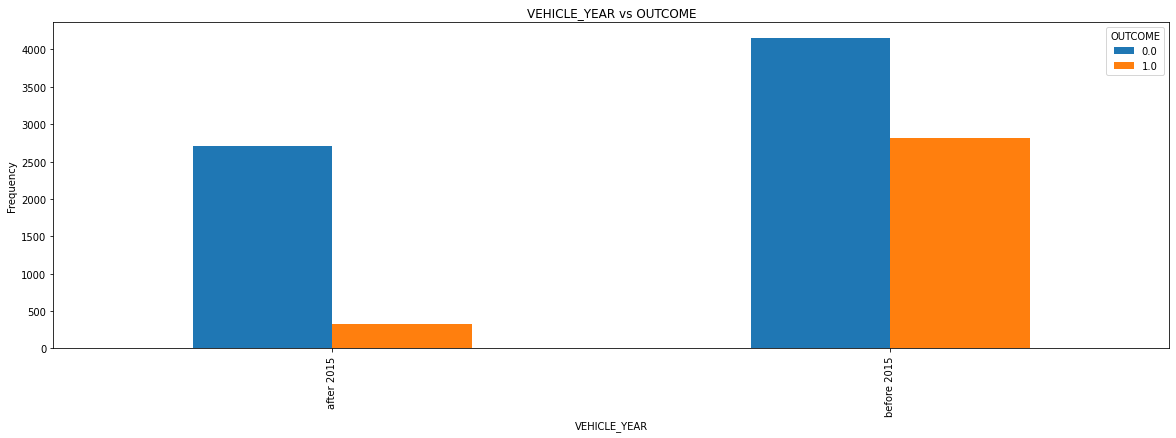

In [ ]:
pd.crosstab(car_insurance.VEHICLE_YEAR,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('VEHICLE_YEAR vs OUTCOME')
plt.xlabel('VEHICLE_YEAR')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) vehichles year before 2015 have claimed the insurance more which concludes older vechiles have claimed the insurance more.

<h2>(2.4.17)-Relationship Between VEHICLE_YEAR VS OUTCOME :<h2>

In [ ]:
car_insurance.VEHICLE_TYPE.drop_duplicates()

0          sedan
25    sports car
Name: VEHICLE_TYPE, dtype: object

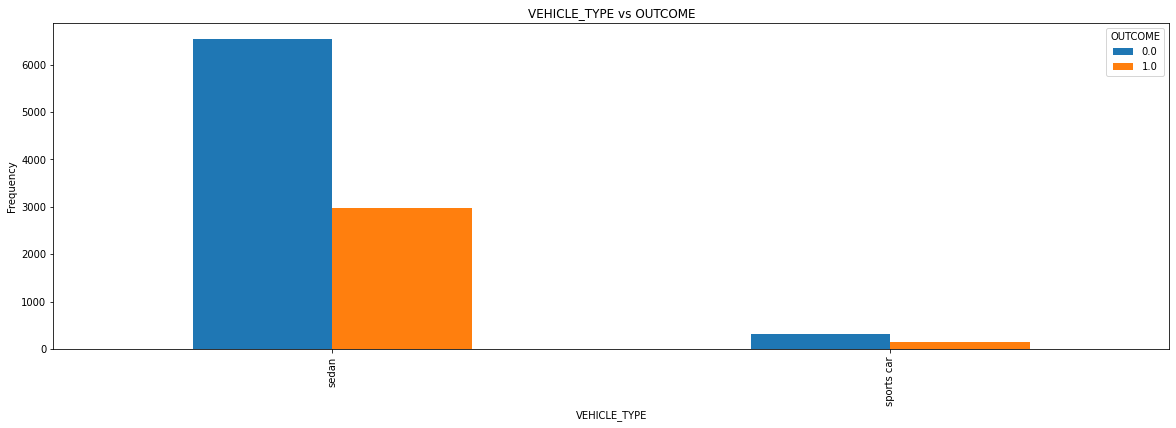

In [ ]:
pd.crosstab(car_insurance.VEHICLE_TYPE,car_insurance.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('VEHICLE_TYPE vs OUTCOME')
plt.xlabel('VEHICLE_TYPE')
plt.ylabel('Frequency')
plt.show()

<h2>Observation:<h2>

1) 'sedan' class have claimed the insurance more as compared to minority class.

2)Most of the data have been involved with 'sedan' class.

<h1>(3)-PREPROCESSING<h1>

<h2>(3.1)-Data Cleaning :<h2>

In [ ]:
#missing data
car_insurance.isnull().sum().sort_values(ascending=False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

<h2>Observation:<h2>

1) From the above observation we can two features have missing values. We can fill the missing values respectively according to their datatype.

2) If the datatype is numerical we will replace the missing values with the mean/median value of that feature.

3) If the datatype is categorical we will replace the missing values with the mode  value (i.e) most repeated value of that feature .

In [ ]:
print('data type of CREDIT_SCORE : ' , car_insurance.dtypes['CREDIT_SCORE'])





data type of CREDIT_SCORE :  float64


In [ ]:
# For 'CREDIT_SCORE' replacing the missing values with mean value

car_insurance['CREDIT_SCORE']=car_insurance['CREDIT_SCORE'].fillna(int(np.mean(car_insurance['CREDIT_SCORE'])))


In [ ]:
print('data type of ANNUAL_MILEAGE : ' , car_insurance.dtypes['ANNUAL_MILEAGE'])


data type of ANNUAL_MILEAGE :  float64


In [ ]:
# For 'CREDIT_SCORE' replacing the missing values with mean value

car_insurance['ANNUAL_MILEAGE']=car_insurance['ANNUAL_MILEAGE'].fillna(int(np.mean(car_insurance['ANNUAL_MILEAGE'])))

<h2>(3.2)-Splitting Data :<h2>

1)We are removing the 'ID' feature from the data since as seen from the EDA it is a idenfication number only.

2) We are also dropping 'OUTCOME' since it is the Decision varible

In [ ]:
car_insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
X = car_insurance.drop(['OUTCOME','ID'], axis=1)
y = car_insurance['OUTCOME']


In [ ]:
X.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


In [ ]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: OUTCOME, dtype: float64

<h2>(3.3)-Encoding the Categorical Features :<h2>

In [ ]:
X.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


In [ ]:
#Encoding the categorical features

X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.columns

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'AGE_26-39', 'AGE_40-64', 'AGE_65+', 'GENDER_male',
       'RACE_minority', 'DRIVING_EXPERIENCE_10-19y',
       'DRIVING_EXPERIENCE_20-29y', 'DRIVING_EXPERIENCE_30y+',
       'EDUCATION_none', 'EDUCATION_university', 'INCOME_poverty',
       'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_YEAR_before 2015', 'VEHICLE_TYPE_sports car'],
      dtype='object')

In [ ]:
X.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_26-39,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1,...,1,0,0,1,0,0,0,1,1,0


<h2>(3.4)-Standardizing the preprocessed data :<h2>

In [ ]:
# Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#feature scaling library
from sklearn.preprocessing import StandardScaler

# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

In [ ]:
from collections import Counter

# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 2500})


<h2>Observation :<h2>

Data is imbalanced so we going to balance it with the help of 'OVERSAMPLING' .

<h2>(3.5)-Oversampling the train data to make it balanced:<h2>

In [ ]:
#resampling library
from imblearn.over_sampling import SMOTE

# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)



In [ ]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 5500})


<h1>(4)-PREDICTION<h1>

<h2>(4.1)Model1 -K Nearest Neighbours:<h2>

<h2>(4.1.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier



distributions = dict(n_neighbors = random.sample(range(1, 50), 10), metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski'])

clf = RandomizedSearchCV(KNeighborsClassifier(), distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)





Best Accuracy : 85.25%
Best Parameters :  {'n_neighbors': 7, 'metric': 'manhattan'}


<h2>(4.1.2)-ROC_AUC SCORE:<h2>

In [ ]:
#Creating a dictionary to store all the Models Test AUC scores

AUC_SCORE = {}

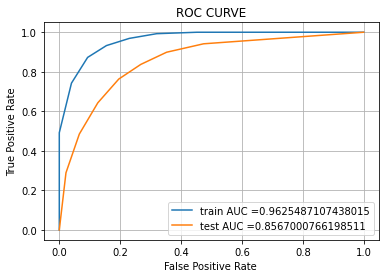

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'] , metric = best_param['metric'] )
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['KNN'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.1.3)-CONFUSION_MATRIX:<h2>

In [ ]:
from sklearn.metrics import roc_auc_score


# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


the maximum value of tpr*(1-fpr) 0.7914842975206611 for threshold 0.714
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      5500
         1.0       0.90      0.87      0.89      5500

    accuracy                           0.89     11000
   macro avg       0.89      0.89      0.89     11000
weighted avg       0.89      0.89      0.89     11000



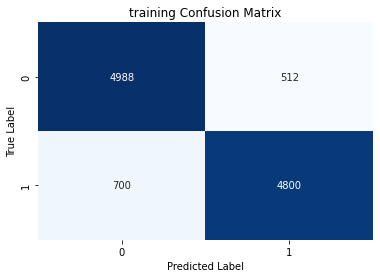

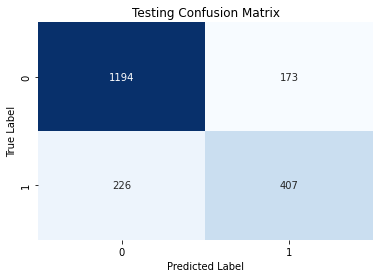

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1367
         1.0       0.70      0.64      0.67       633

    accuracy                           0.80      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.80      0.80      0.80      2000



<h2>(4.2) Model2-Gaussian Naive Bayes:<h2>

<h2>(4.2.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB



distributions = dict(var_smoothing = [1e-09,0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100])

clf = RandomizedSearchCV(GaussianNB(), distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)





Best Accuracy : 77.06%
Best Parameters :  {'var_smoothing': 0.0005}


<h2>(4.2.2)-ROC_AUC SCORE:<h2>

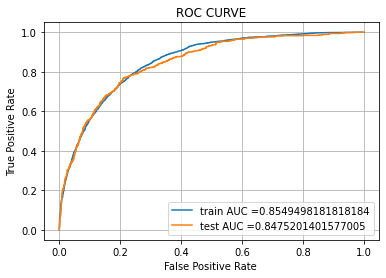

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = GaussianNB(var_smoothing = best_param['var_smoothing'] )
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['NAIVE_BAYES'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.2.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.5995119669421488 for threshold 0.954
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      5500
         1.0       0.77      0.79      0.78      5500

    accuracy                           0.77     11000
   macro avg       0.77      0.77      0.77     11000
weighted avg       0.77      0.77      0.77     11000



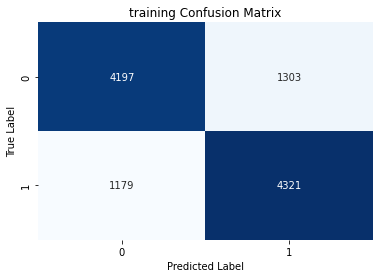

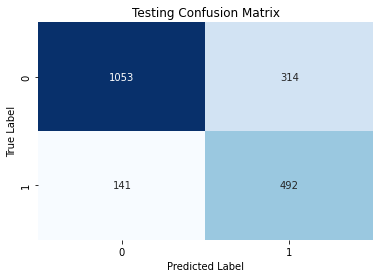

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

<h2>(4.3) Model3-Logistic Regression:<h2>

<h2>(4.3.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression



distributions = dict( C = [0.25,0.5,0.75,1])

clf = RandomizedSearchCV(LogisticRegression(), distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)





Best Accuracy : 83.45%
Best Parameters :  {'C': 0.5}


<h2>(4.3.2)-ROC_AUC SCORE:<h2>

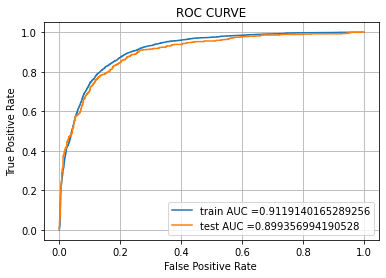

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = LogisticRegression(C = best_param['C'] )
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['Logistic Regression'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.3.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.7001515371900826 for threshold 0.559
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      5500
         1.0       0.84      0.83      0.84      5500

    accuracy                           0.84     11000
   macro avg       0.84      0.84      0.84     11000
weighted avg       0.84      0.84      0.84     11000



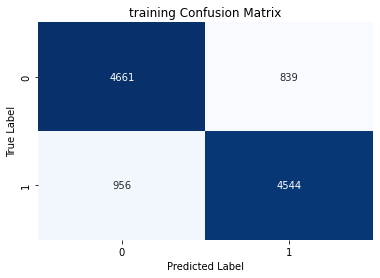

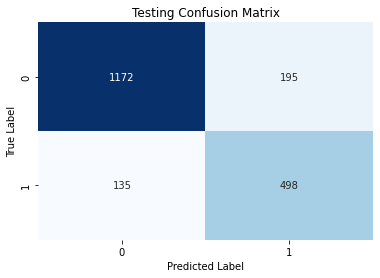

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

<h2>(4.4) Model4-Support Vector Machines:<h2>

<h2>(4.4.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC



distributions = dict( C = [0.25,0.5,0.75,1] , kernel=['linear', 'rbf'])

clf = RandomizedSearchCV(SVC(),distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)





Best Accuracy : 85.22%
Best Parameters :  {'kernel': 'rbf', 'C': 1}


<h2>(4.4.2)-ROC_AUC SCORE:<h2>

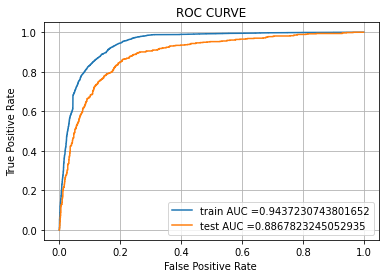

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = SVC(C = best_param['C'],kernel = best_param['kernel'] ,probability = True)
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['SVC'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.4.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.7666909090909091 for threshold 0.431
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      5500
         1.0       0.85      0.91      0.88      5500

    accuracy                           0.88     11000
   macro avg       0.88      0.88      0.88     11000
weighted avg       0.88      0.88      0.88     11000



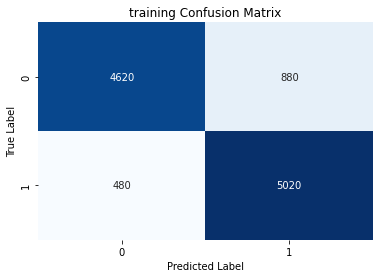

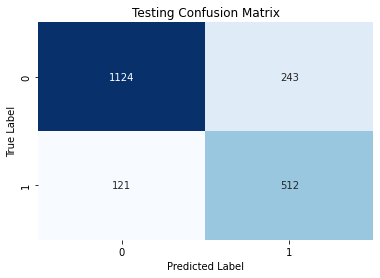

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

<h2>(4.5) Model5-Decision Tree:<h2>

<h2>(4.5.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

distributions = dict( max_depth = [1, 5, 10, 50] , min_samples_split= [5, 10, 100, 500])

clf = RandomizedSearchCV(DecisionTreeClassifier(),distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)





Best Accuracy : 85.68%
Best Parameters :  {'min_samples_split': 10, 'max_depth': 10}


<h2>(4.5.2)-ROC_AUC SCORE:<h2>

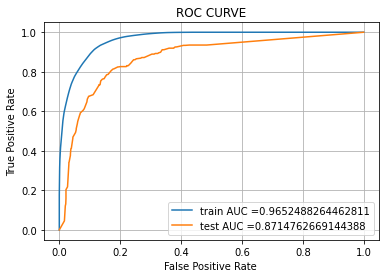

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = DecisionTreeClassifier(max_depth = best_param['max_depth'],min_samples_split = best_param['min_samples_split'] )
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['Decision_Tree'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.5.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.8085012892561984 for threshold 0.515
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90      5500
         1.0       0.88      0.93      0.90      5500

    accuracy                           0.90     11000
   macro avg       0.90      0.90      0.90     11000
weighted avg       0.90      0.90      0.90     11000



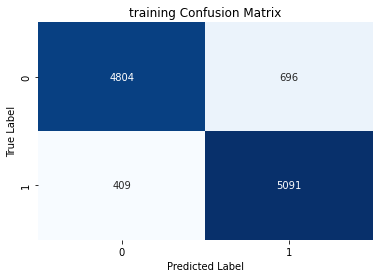

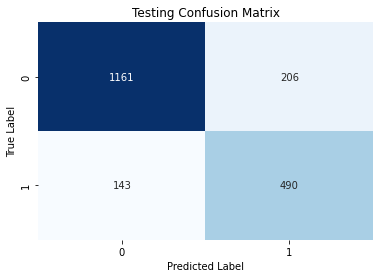

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

<h2>(4.6) Model6-GBDT:<h2>

<h2>(4.6.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


distributions = dict( learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , n_estimators=[5,10,50, 75, 100, 200])

clf = RandomizedSearchCV(GradientBoostingClassifier(),distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)





Best Accuracy : 87.94%
Best Parameters :  {'n_estimators': 100, 'learning_rate': 0.1}


<h2>(4.6.2)-ROC_AUC SCORE:<h2>

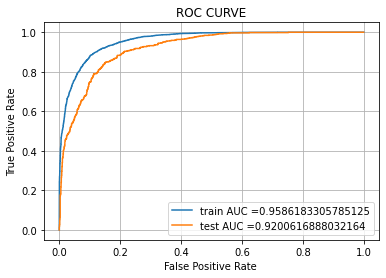

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = GradientBoostingClassifier(learning_rate = best_param['learning_rate'],n_estimators = best_param['n_estimators'] )
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['GBDT'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.6.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.7928764958677685 for threshold 0.531
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      5500
         1.0       0.89      0.90      0.89      5500

    accuracy                           0.89     11000
   macro avg       0.89      0.89      0.89     11000
weighted avg       0.89      0.89      0.89     11000



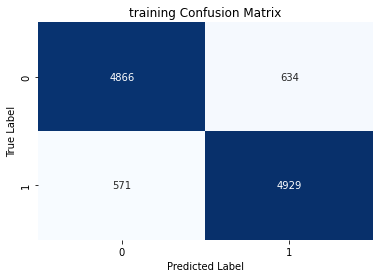

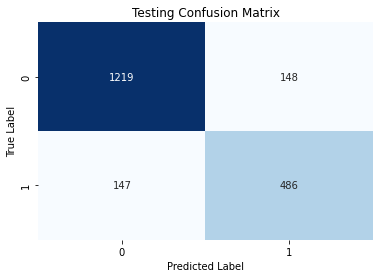

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

<h2>(4.7) Model7-Random Forest:<h2>

<h2>(4.7.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier




distributions = dict(n_estimators = [5,10,50, 75, 100, 200])

clf = RandomizedSearchCV(RandomForestClassifier(),distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)


Best Accuracy : 88.45%
Best Parameters :  {'n_estimators': 200}


<h2>(4.7.2)-ROC_AUC SCORE:<h2>

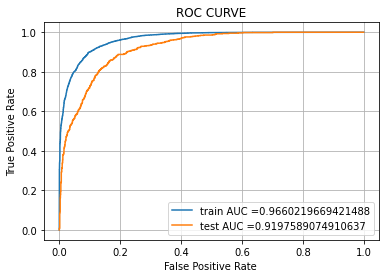

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = GradientBoostingClassifier(n_estimators = best_param['n_estimators'] )
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['Random Forest'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.7.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.8117980165289256 for threshold 0.543
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      5500
         1.0       0.90      0.90      0.90      5500

    accuracy                           0.90     11000
   macro avg       0.90      0.90      0.90     11000
weighted avg       0.90      0.90      0.90     11000



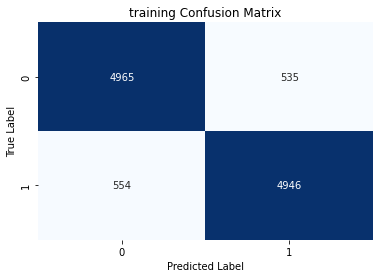

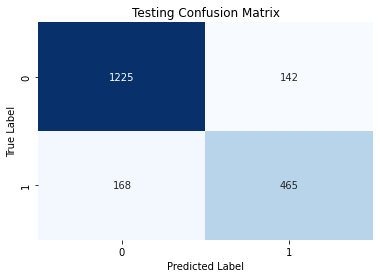

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

<h2>(4.8) Model8-XGBoost :<h2>

<h2>(4.8.1)-Hyperparameter Tuning:<h2>

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

distributions = dict(max_depth = [2,3, 4, 5, 6],learning_rate = [0.001,0.1, 0.01, 0.05], subsample = [0.6,0.7,0.8],colsample_bytree = [0.5,0.6,0.7])

clf = RandomizedSearchCV(xgb.XGBClassifier(),distributions, random_state=0)

clf.fit(X_train, y_train)

best_accuracy = clf.best_score_

best_param = clf.best_params_

print('Best Accuracy : {:.2f}%'.format(best_accuracy*100))
    
print('Best Parameters : ',best_param)


Best Accuracy : 88.06%
Best Parameters :  {'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


<h2>(4.8.2)-ROC_AUC SCORE:<h2>

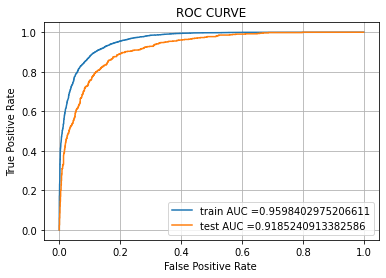

In [ ]:
#Testing the performance of the model on test data, plotting ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clf = xgb.XGBClassifier(max_depth = best_param['max_depth'] ,learning_rate = best_param['learning_rate'],
                        subsample = best_param['subsample'],colsample_bytree = best_param['colsample_bytree'])
                          
clf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_train)[:,1]   
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid()
plt.show() 

#storing the Test AUC score
AUC_SCORE['XGBoost'] = round(auc(test_fpr, test_tpr),3)

<h2>(4.8.3)-CONFUSION_MATRIX:<h2>

the maximum value of tpr*(1-fpr) 0.7948528925619834 for threshold 0.554
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      5500
         1.0       0.89      0.89      0.89      5500

    accuracy                           0.89     11000
   macro avg       0.89      0.89      0.89     11000
weighted avg       0.89      0.89      0.89     11000



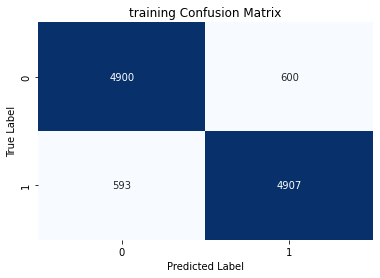

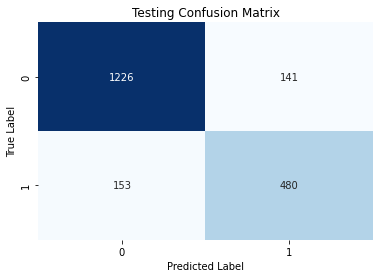

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print(classification_report(y_train,predict_with_best_t(y_train_pred, best_t)))

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('training Confusion Matrix')
plt.show()



sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,fmt="d",cmap='Blues',cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')
plt.show()

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["MODEL","AUC_SCORE"]
for i,j in AUC_SCORE.items() :
  x.add_row([i,j])
print(x)

+---------------+-----------+
|     MODEL     | AUC_SCORE |
+---------------+-----------+
| Decision_Tree |   0.871   |
|      GBDT     |    0.92   |
| Random Forest |    0.92   |
|    XGBoost    |   0.919   |
+---------------+-----------+


<h1>(5)-SUMMARY<h1>

1) After doing Exploratory Data Analysis we came to know how each feature influences the decision variable and how subclassses of each variable influences.

2) We came to know that it is a imbalanced data set , so we have upsampling for our training data such that there won't be any bias towards the subclasses of the decision varible.

3) Since it is a Binary classification model i have choosen 'ROC_AUC" as the performance metric and done preprocessing with the features.

4) With the help of 'RandomizedSearchCV' i have fine tuned the hyperparameters of various classification models and seen how well the models performed for our dataset and obtained quite decent results.

5) Out of all the models ensemble models performs very well for our dataset and  GBDT,Random Forest,XG boost have given merely a same  highest AUC score of  **0.92** 